In [3]:
%matplotlib inline
import os
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import datetime


### TIINGO

In [4]:

df = pdr.get_data_tiingo('GOOG', api_key=os.getenv("TIINGO_API_KEY"))
df[-10:]


close     high      low     open   volume  \
symbol date                                                                     
GOOG   2019-11-11 00:00:00+00:00  1299.19  1306.42  1297.41  1303.18  1012429   
       2019-11-12 00:00:00+00:00  1298.80  1310.00  1295.77  1300.00  1085859   
       2019-11-13 00:00:00+00:00  1298.00  1304.30  1293.51  1294.07   853861   
       2019-11-14 00:00:00+00:00  1311.46  1317.00  1295.65  1297.50  1194305   
       2019-11-15 00:00:00+00:00  1334.87  1334.88  1314.28  1318.94  1782955   
       2019-11-18 00:00:00+00:00  1320.70  1335.53  1317.50  1332.22  1488083   
       2019-11-19 00:00:00+00:00  1315.46  1327.70  1312.80  1327.70  1269372   
       2019-11-20 00:00:00+00:00  1303.05  1315.00  1291.15  1311.74  1309835   
       2019-11-21 00:00:00+00:00  1301.35  1312.59  1293.00  1301.48   995499   
       2019-11-22 00:00:00+00:00  1295.34  1308.73  1291.41  1305.62  1386506   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
GOOG   2019-11-11 00:00:00+00:00   1299.19  1306.42  1297.41  1303.18   
       2019-11-12 00:00:00+00:00   1298.80  1310.00  1295.77  1300.00   
       2019-11-13 00:00:00+00:00   1298.00  1304.30  1293.51  1294.07   
       2019-11-14 00:00:00+00:00   1311.46  1317.00  1295.65  1297.50   
       2019-11-15 00:00:00+00:00   1334.87  1334.88  1314.28  1318.94   
       2019-11-18 00:00:00+00:00   1320.70  1335.53  1317.50  1332.22   
       2019-11-19 00:00:00+00:00   1315.46  1327.70  1312.80  1327.70   
       2019-11-20 00:00:00+00:00   1303.05  1315.00  1291.15  1311.74   
       2019-11-21 00:00:00+00:00   1301.35  1312.59  1293.00  1301.48   
       2019-11-22 00:00:00+00:00   1295.34  1308.73  1291.41  1305.62   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2019-11-11 00:00:00+00:00    1012429      0.0          1.0  
       2019-11-12 00:00:00+00:00    1085859      0.0          1.0  
       2019-11-13 00:00:00+00:00     853861      0.0          1.0  
       2019-11-14 00:00:00+00:00    1194305      0.0          1.0  
       2019-11-15 00:00:00+00:00    1782955      0.0          1.0  
       2019-11-18 00:00:00+00:00    1488083      0.0          1.0  
       2019-11-19 00:00:00+00:00    1269372      0.0          1.0  
       2019-11-20 00:00:00+00:00    1309835      0.0          1.0  
       2019-11-21 00:00:00+00:00     995499      0.0          1.0  
       2019-11-22 00:00:00+00:00    1386506      0.0          1.0

### IEX

In [5]:
start = datetime(2015, 9, 1)
end = datetime(2019, 9, 1)
f = web.DataReader('FB', 'iex', start, end, api_key=os.getenv("IEX_API_KEY"))

f.loc['2018-08-31']

open           177.15
high           177.62
low            174.98
close          175.73
volume    18065159.00
Name: 2018-08-31, dtype: float64

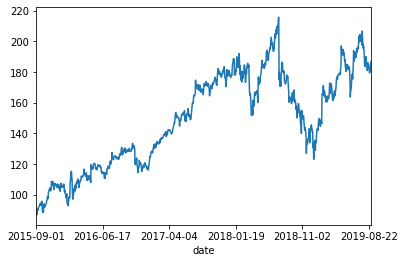

In [6]:
f.open.plot()

In [18]:
f = web.DataReader('AAPL', 'iex-tops')
f[:10]

""


### Alpha Vantage

In [ ]:
## get api key
ALPHAVANTAGE_API_KEY = ""

## av-intraday, av_daily, av_daily_adjusted, ..
f = web.DataReader("AAPL", "av-daily", start=datetime(2017, 2, 9),
                    end=datetime(2017, 5, 24),
                    api_key=ALPHAVANTAGE_API_KEY)

In [36]:
f.loc["2017-02-09"]

open      1.316500e+02
high      1.324450e+02
low       1.311200e+02
close     1.324200e+02
volume    2.834986e+07
Name: 2017-02-09, dtype: float64

In [38]:
# real time quotes for up to 100 symbols

web.get_quote_av(["AAPL", "TSLA"], api_key=ALPHAVANTAGE_API_KEY)

,price,volume,timestamp
symbol,,,
AAPL,262.650,NaN,2019-11-22 15:59:59
TSLA,332.955,NaN,2019-11-22 15:59:58


### Nasdaq aymbols

In [1]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

symbols = get_nasdaq_symbols()

In [2]:
print(symbols.loc['IBM'])

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                    100
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object


In [3]:
inds = symbols.index
print(inds[:100])

Index(['A', 'AA', 'AAAU', 'AACG', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI',
       'AAON', 'AAP', 'AAPL', 'AAT', 'AAU', 'AAWW', 'AAXJ', 'AAXN', 'AB',
       'ABB', 'ABBV', 'ABC', 'ABCB', 'ABDC', 'ABEO', 'ABEV', 'ABG', 'ABIO',
       'ABM', 'ABMD', 'ABR', 'ABR$A', 'ABR$B', 'ABR$C', 'ABT', 'ABTX', 'ABUS',
       'AC', 'ACA', 'ACAD', 'ACAM', 'ACAMU', 'ACAMW', 'ACB', 'ACBI', 'ACC',
       'ACCO', 'ACEL', 'ACEL.W', 'ACER', 'ACES', 'ACGL', 'ACGLO', 'ACGLP',
       'ACH', 'ACHC', 'ACHN', 'ACHV', 'ACIA', 'ACIO', 'ACIU', 'ACIW', 'ACLS',
       'ACM', 'ACMR', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACRE', 'ACRS', 'ACRX',
       'ACSG', 'ACSI', 'ACST', 'ACT', 'ACTG', 'ACTT', 'ACTTU', 'ACTTW', 'ACU',
       'ACV', 'ACWF', 'ACWI', 'ACWV', 'ACWX', 'ACY', 'ADAP', 'ADBE', 'ADC',
       'ADES', 'ADI', 'ADIL', 'ADILW', 'ADM', 'ADMA', 'ADME', 'ADMP', 'ADMS',
       'ADNT'],
      dtype='object', name='Symbol')


In [10]:
# convert to list
inds.tolist().index("AA")

1